# 3rd trial referrer: [Video](https://www.youtube.com/watch?v=tnaq2Ao4KBE)

1. Auto-Regressive Integrated Moving Average Model (ARIMA)
    1. ARIMA
    1. SARIMA
    1. SARIMAX
    1. Auto ARIMA
1. Feed Forward Fully connected neural network (FFNN)
1. Recurrent neural network (RNN)(LSTM)

## Data cleaning 

In [1]:
import statsmodels.api as sm
import pandas as pd

In [2]:
df = pd.read_csv('../Data/cleanned/zusammen.csv', parse_dates=['date'])
df = df.drop(['rohwert'], axis=1)
# df = df.drop(columns=['date'])
df.set_index('date', inplace=True)

In [3]:
df.columns

Index(['wert', 'temp', 'dwpt', 'rhum', 'prcp'], dtype='object')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

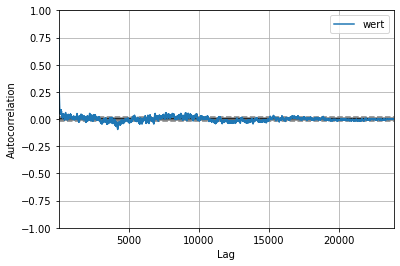

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['wert'], label='wert')


In [6]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df['wert'])


(0.01, False)

## Auto-Arima [GitHub Code](https://github.com/bnsreenu/python_for_microscopists/blob/master/163-Intro_to_time_series_Forecasting_using_ARIMA.py)

In [4]:
# from pmdarima.arima import auto_arima
# #Autoarima gives us bet model suited for the data
# # p - number of autoregressive terms (AR)
# # q - Number of moving avergae terms (MA)
# # d - number of non-seasonal differences
# #p, d, q represent non-seasonal components
# #P, D, Q represent seasonal components
# arima_model = auto_arima(df['wert'], start_p = 1, d=1, start_q = 1, 
#                             max_p = 5, max_q = 5, max_d=5, m = 12, 
#                             start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
#                             seasonal = True, 
#                             trace = True, 
#                             error_action ='ignore',   
#                             suppress_warnings = True,  
#                             stepwise = True, n_fits=50) 

In [5]:
# print(arima_model.summary())

## Basic Neural Network(Keras) [GitHUb Code](https://github.com/bnsreenu/python_for_microscopists/blob/master/164b-Intro_to_time_series_Forecasting_using_feed_forward_NN_and_TimeseriesGenerator.py) 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
df2 = df.pop("wert")

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
df2 = scaler.fit_transform(df2)

ValueError: Expected 2D array, got 1D array instead:
array=[36. 31. 32. ... 37. 27. 30.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
df2.to_numpy()

array([36, 31, 32, ..., 37, 27, 30])

In [17]:
type(df2)

pandas.core.series.Series

In [ ]:
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 
